In [113]:
##-----Library Imports------##
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
import seaborn as sns

In [114]:
##-----STEP ONE: Import Data-----##
#data_path = "4-Feature Selection - With Outliers - 34 Features - No Repeats.csv"
data_path = "2-Feature Engineering - All Present - With Outliers.csv"
df = pd.read_csv(data_path)
pd.set_option('display.max_columns', None)
df.head(5)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,time_since_first_review,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores,log_amenity_scores
0,3191,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",2008-10-21,I'm single and love to travel and meeting peop...,within an hour,100%,NaN,t,1.0,1.0,t,t,"Southern Suburbs, Western Cape, South Africa",NaN,57.0,NaN,Southern Suburbs,Western Cape,62,Cape Town,"Southern Suburbs, South Africa",ZA,South Africa,-33.94739,18.47600,t,21,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Free...",953.314286,661.0,"$4,221.00","$16,884.00",2656.082216,211.000000,2,0.0,3,730,3,3,730,730,3.0,730.0,3 weeks ago,t,2,20,50,319,49,7,2013-05-31,2019-12-15,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,f,NaN,t,f,moderate,f,f,1,1,0,0,0.610000,6.493754,4+ years,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2663.663320,7.887833
1,13044,JAMBO Guest House / Green Room,The Green Room at Jambo Guest House is a sligh...,"Jambo, which means hello in Swahili, is a gues...",The Green Room at Jambo Guest House is a sligh...,none,Green Point is a popular leisure district domi...,Very centrally situated and walking distance t...,A lot of big attractions are within walking di...,Guests will have access to their own private r...,Barry and Mina will be around to ensure you ha...,We expect our guests to be well behaved. Only ...,2009-11-02,We have been running multi Award Winning Jambo...,within an hour,100%,NaN,f,5.0,5.0,t,f,"Cape Town, Western Cape, South Africa",NaN,115.0,NaN,Cape Town,Western Cape,125,Cape Town,"Cape Town, South Africa",ZA,South Africa,-33.90771,18.40535,t,3,Hotel room,2,1.0,1.0,1.0,Real Bed,"TV,Wifi,Air conditioning,Breakfast,Free street...",269.000000,2105.0,NaN,NaN,0.000000,0.000000,2,0.0,3,30,1,3,30,30,1.1,30.0,today,t,0,0,0,0,2,0,2011-10-24,20

## Text Feature Engineering

-Bag-of-words model
-Word Counts with CountVectorizer
-Word Frequencies with TfidfVectorizer

In [115]:
##-----Library Imports for Textual Analysis------##
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

#### Obtain TF-IDF metric
Convert a collection of raw documents to a matrix of TF-IDF features.

In [116]:
text_data = df["summary"]
text_data.replace(np.nan, "", inplace = True)

#vocab = ["catering","central", "friendly", "view", "walking distance", "clean", "internet"]


tfidf=TfidfVectorizer(use_idf=True,ngram_range=(1,2))
#tfidf=TfidfVectorizer(use_idf=True,ngram_range=(1,2), vocabulary=vocab)
#tfidf = CountVectorizer(vocabulary=vocab)

tfidf_vectors=tfidf.fit_transform(text_data)
 
# Show tf-idf output
text_df = pd.DataFrame(tfidf_vectors[0].T.todense(), index=tfidf.get_feature_names(), columns=["tfidf"])
temp = text_df.sort_values(by=["tfidf"],ascending=False)
temp.head(10)

,tfidf
hospital,0.213799
mowbray,0.202145
separate,0.152016
med staff,0.136006
of academics,0.136006
staff students,0.136006
lovely separate,0.136006
area mowbray,0.136006
hospital mowbray,0.136006
and teaching,0.136006


#### Perform Singular Value Decomposition 

In [117]:
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=0)
svd_out = svd.fit_transform(tfidf_vectors)
#svd_out = tfidf_vectors.toarray()
svd_df = pd.DataFrame(svd_out, index=None, columns=None)
svd_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.673273e-01,-3.482024e-02,1.009738e-01,3.376537e-02,4.345224e-03,9.116789e-03,-5.086201e-02,-2.964355e-02,-2.744640e-03,-3.030086e-02,-9.955873e-03,2.185347e-02,3.129390e-02,2.327253e-02,3.557220e-02,-6.932598e-02,-2.411640e-02,2.421111e-02,1.411763e-02,-3.910990e-02,-4.609490e-02,-8.862483e-03,-4.566793e-02,1.976960e-02,-2.807634e-02,1.203301e-03,8.687753e-03,1.004574e-02,4.072302e-02,4.377863e-02,-3.324338e-02,1.292697e-02,3.043708e-02,1.105547e-02,1.271484e-02,2.559977e-02,3.422600e-02,-1.315981e-02,4.491891e-03,-6.327055e-02,1.447201e-02,1.512700e-02,-4.287032e-02,3.805873e-02,-6.986896e-03,2.876083e-02,-1.603098e-02,5.634153e-05,-4.036394e-02,-7.974576e-03
1,1.015688e-01,-1.189581e-02,5.585237e-02,-1.022674e-02,-1.634599e-02,2.452292e-02,-4.308531e-03,-1.159469e-02,-3.034657e-02,-1.775935e-03,2.709729e-03,-2.788413e-02,-3.104870e-02,-2.424730e-03,1.272132e-02,2.474121e-03,-6.462261e-03,1.530805e-02,2.079365e-02,-7.881586e-03,8.900881e-03,-2.941343e-02,1.408170e-02,-1.373732e-02,-1.590844e-02,-5.942871e-03,1.523560e-02,-2.257879e-02,-1.886252e-03,-3.135458e-02,4.280049e-03,-2.167959e-02,-3.500539e-02,-9.143800e-03,-8.255078e-03,2.173129e-02,1.193421e-02,2.898221e-02,-1.471240e-02,6.523234e-03,2.451561e-02,8.473137e-03,-9.555318e-03,-1.588243e-02,2.680043e-02,-1.475285e-02,1.218952e-02,1.817476e-02,-4.784990e-03,-4.247312e-03
2,1.777701e-01,-2.876564e-02,1.880839e-02,-3.807062e-03,-3.729350e-02,-4.655714e-02,3.869043e-02,1.482462e-02,-3.674713e-02,1.099171e-02,4.007302e-02,-4.252849e-02,2.835021e-02,-4.550855e-02,-1.569102e-03,1.638300e-03,6.995711e-02,3.759534e-03,-3.825271e-02,3.176242e-02,-4.617354e-02,-4.254878e-02,4.648865e-02,-4.962448e-02,-4.030528e-02,-7.118558e-03,-7.978118e-03,6.415069e-03,1.909484e-03,-4.625527e-02,2.444822e-02,1.162304e-02,8.414296e-03,5.294120e-02,7.965316e-03,7.514177e-03,-2.893785e-02,2.898319e-02,4.815509e-02,-8.956845e-03,5.649565e-02,-1.487028e-02,-2.454417e-02,-2.210691e-02,-2.479820e-02,5.486348e-02,-1.891615e-02,1.344386e-02,3.868529e-02,1.283411e-02
3,1.423560e-01,-2.974059e-02,6.572327e-02,-2.990304e-02,-2.786903e-02,3.165845e-02,-1.761563e-02,2.047495e-03,-2.913556e-02,3.607834e-02,4.550256e-03,-5.647110e-02,1.738383e-02,-8.506845e-03,-3.580842e-02,1.607931e-02,-7.762453e-03,1.741852e-03,-2.180892e-02,1.175970e-02,8.654045e-03,-1.465298e-03,1.625693e-02,-3.106306e-02,4.061420e-03,4.017900e-02,6.403454e-03,7.135236e-03,-6.614058e-02,-1.926077e-02,-1.458234e-02,5.495787e-04,-9.039735e-03,-7.556110e-03,-1.584068e-02,8.112250e-03,-1.664901e-02,-9.035152e-03,-1.647160e-02,-3.715168e-02,1.102490e-02,6.806029e-03,8.661679e-03,2.963741e-02,3.164837e-03,-3.049936e-02,2.109207e-02,-7.660085e-03,-7.299219e-03,5.134896e-03
4,1.308540e-23,-7.097815e-19,7.965854e-17,6.029642e-16,-2.373690e-15,-1.497200e-15,-2.419170e-15,-5.750034e-15,-1.097222e-14,1.690785e-15,7.006537e-15,3.875496e-16,-1.414781e-15,1.984259e-15,-2.298545e-15,1.854454e-15,-1.168096e-15,2.673021e-15,1.111651e-16,1.511761e-16,-2.917856e-16,-3.018945e-16,-3.366639e-17,-2.350375e-16,1.435894e-16,-2.292412e-16,2.085756e-16,6.868907e-16,3.919037e-16,-3.017135e-17,-3.874306e-16,-3.981188e-16,-1.175470e-16,-1.895099e-16,-3.360280e-17,-2.209138e-17,4.511685e-16,1.078309e-16,1.578767e-16,1.637087e-17,6.184162e-17,-9.478374e-18,1.412571e-16,-3.303101e-17,4.985705e-17,-9.658184e-17,1.406748e-16,1.260178e-16,-2.207498e-17,-2.394031e-16


#### Select  n SVD components with highest correlation with log price

In [118]:
num_SVD_components = 5;
svd_corr  = []

for i in range (0, svd_df.shape[1]):
    svd_corr.append(df["log_price"].corr(svd_df[i]))

svd_corr = np.array(svd_corr)
svd_indexes = svd_corr.argsort()[-num_SVD_components:][::-1]
svd_df_reduced = svd_df[svd_indexes]

print("R^2 of best",num_SVD_components,"compenents:",svd_corr[svd_indexes])

R^2 of best 5 compenents: [0.23840421 0.16328016 0.13032156 0.10284084 0.09660846]


#### Concat selected SVD components with existing features

In [119]:
data_path = "experimental_data_5_.csv"
df_in = pd.read_csv(data_path)
existing_features = df_in[["log_price", "accommodates", "bedrooms", "bathrooms", "longitude", "latitude", "cleaning_fee", "property_type", "neighbourhood_cleansed", "beds", "number_of_reviews_ltm", "room_type", "zipcode", "extra_people", "review_scores_value", "amenity_scores"]]
existing_features.reset_index(drop=True, inplace=True)
svd_df_reduced.reset_index(drop=True, inplace=True)

new_features = pd.concat([existing_features,svd_df_reduced],axis=1)
new_features.head(5)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (31,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,log_price,accommodates,bedrooms,bathrooms,longitude,latitude,cleaning_fee,property_type,neighbourhood_cleansed,beds,number_of_reviews_ltm,room_type,zipcode,extra_people,review_scores_value,amenity_scores,8,6,21,10,13
0,6.493754,2.0,1.0,1.0,18.47600,-33.94739,211.000000,21.0,58.0,1.0,7.0,0.0,7700.0,0.0,10.0,2665.699673,-2.744640e-03,-5.086201e-02,-8.862483e-03,-9.955873e-03,2.327253e-02
1,7.652071,2.0,1.0,1.0,18.40535,-33.90771,0.000000,3.0,17.0,1.0,0.0,1.0,8051.0,0.0,10.0,1461.157203,-3.034657e-02,-4.308531e-03,-2.941343e-02,2.709729e-03,-2.424730e-03
2,7.624619,6.0,3.0,3.0,18.46180,-33.80114,850.000000,25.0,30.0,4.0,2.0,0.0,7441.0,250.0,10.0,3614.261809,-3.674713e-02,3.869043e-02,-4.254878e-02,4.007302e-02,-4.550855e-02
3,7.198184,2.0,1.0,1.5,18.48970,-33.85878,322.837434,1.0,41.0,2.0,0.0,2.0,7441.0,0.0,10.0,3262.852311,-2.913556e-02,-1.761563e-02,-1.465298e-03,4.550256e-03,-8.506845e-03
4,7.095893,4.0,2.0,1.5,18.43128,-34.03863,0.000000,21.0,74.0,4.0,1.0,0.0,7806.0,200.0,10.0,3292.690179,-1.097222e-14,-2.419170e-15,-3.018945e-16,7.006537e-15,1.984259e-15


In [120]:
new_features.to_csv("../sample_data_6.csv", index=False) #save test data

#### Make dataset with multiple text features

In [121]:
##----Create final dataset with textual features----##

df_in = pd.read_csv("2-Feature Engineering - Continuous and Categorical.csv")
df_in2 = pd.read_csv("2-Feature Engineering - Textual.csv")
existing_features = pd.concat([df_in,df_in2],axis=1)

new_features = df_in
#text_features = ["summary", "space","description","neighborhood_overview","notes","transit","access","interaction","house_rules","host_about"]
text_features = ["summary", "space","description","neighborhood_overview","access","interaction","house_rules","host_about"]



tfidf=TfidfVectorizer(use_idf=True)
#tfidf=TfidfVectorizer(use_idf=True,ngram_range=(1,2))

for curr_feat in text_features:
    text_data = existing_features[curr_feat]
    text_data.replace(np.nan, "", inplace = True)
    tfidf_vectors=tfidf.fit_transform(text_data)
 
    #svd = TruncatedSVD(n_components=10, n_iter=7, random_state=0)
    svd = TruncatedSVD(n_components=50, n_iter=7, random_state=0)
    svd_out = svd.fit_transform(tfidf_vectors)
    svd_df = pd.DataFrame(svd_out, index=None, columns=None)

    num_SVD_components = 3;
    svd_corr  = []

    for i in range (0, svd_df.shape[1]):
        svd_corr.append(abs(df_in["log_price"].corr(svd_df[i])))

    svd_corr = np.array(svd_corr)
    svd_indexes = svd_corr.argsort()[-num_SVD_components:][::-1]
    svd_df_reduced = svd_df[svd_indexes]
    
    col_names=[]
    for i in range (0, num_SVD_components):
        n = curr_feat+"_SVD"+str(i+1)
        col_names.append(n)
        
    svd_df_reduced.columns = col_names
    
    #print(len(svd_df_reduced),len(new_features))
    print("corr of best",num_SVD_components,"compenents in",curr_feat,":",svd_corr[svd_indexes])

    svd_df_reduced.reset_index(drop=True, inplace=True)
    new_features = pd.concat([new_features,svd_df_reduced],axis=1)
    
new_features.head(5)

corr of best 3 compenents in summary : [0.3789782  0.20471655 0.12965539]
corr of best 3 compenents in space : [0.19526337 0.18547368 0.11294275]
corr of best 3 compenents in description : [0.34455522 0.24776211 0.1905706 ]
corr of best 3 compenents in neighborhood_overview : [0.1578242  0.12539254 0.11727909]
corr of best 3 compenents in access : [0.14560037 0.11592466 0.08835913]
corr of best 3 compenents in interaction : [0.12377988 0.09636981 0.08533524]
corr of best 3 compenents in house_rules : [0.14630544 0.11121078 0.08520258]
corr of best 3 compenents in host_about : [0.14683817 0.06676354 0.06667248]


,log_price,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores,summary_SVD1,summary_SVD2,summary_SVD3,space_SVD1,space_SVD2,space_SVD3,description_SVD1,description_SVD2,description_SVD3,neighborhood_overview_SVD1,neighborhood_overview_SVD2,neighborhood_overview_SVD3,access_SVD1,access_SVD2,access_SVD3,interaction_SVD1,interaction_SVD2,interaction_SVD3,house_rules_SVD1,house_rules_SVD2,house_rules_SVD3,host_about_SVD1,host_about_SVD2,host_about_SVD3
0,6.493754,3191,1.0,1.0,1.0,1.0,57.0,62,-33.94739,18.47600,1,21,2,1.0,1.0,1.0,661.0,2656.082216,211.000000,2,0.0,3,730,3,3,730,730,3.0,730.0,1,2,20,50,319,49,7,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0,1,0,0,0,1,1,0,0,0.610000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2663.663320,-3.617314e-02,2.243312e-02,-4.086990e-02,0.001492,-0.124890,0.038315,0.010927,-0.146725,-0.096208,-0.010653,-0.003074,-0.102751,-0.038241,-0.165265,0.139044,0.010833,-0.010946,-0.003911,0.150103,-0.020829,0.094639,-1.661607e-01,-1.274255e-02,-4.633390e-02
1,7.652071,13044,0.0,5.0,1.0,0.0,115.0,125,-33.90771,18.40535,1,3,2,1.0,1.0,1.0,2105.0,0.000000,0.000000,2,0.0,3,30,1,3,30,30,1.1,30.0,1,0,0,0,0,2,0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,1,0,0,0,5,0,0,0,0.020000,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1459.786779,-5.004628e-02,-3.579589e-02,3.588734e-02,0.022125,0.019245,0.034231,0.005448,-0.021422,-0.029890,0.089120,-0.004582,0.040303,-0.082266,-0.157155,0.064531,0.008448,-0.048546,-0.077724,-0.021170,-0.010612,0.142739,1.258846e-01,1.352890e-02,3.054207e-02
2,7.624619,15007,1.0,12.0,1.0,1.0,23.0,31,-33.80114,18.46180,1,25,6,3.0,3.0,4.0,2048.0,2500.000000,850.000000,6,250.0,2,120,2,2,120,120,2.0,120.0,1,0,2,32,293,27,2,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,0,0,0,0,2,2,0,0,0.370000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,3612.146587,6.196324e-02,6.545631e-03,-1.251741e-01,0.058922,-0.003018,-0.087462,-0.051035,0.063836,-0.106632,0.056761,0.018276,0.027745,0.090246,-0.084449,0.026858,-0.062756,-0.004105,0.048072,-0.002762,0.029302,0.165877,-4.881418e-02,2.009630e-03,3.447136e-02
3,7.198184,15077,0.0,5.0,1.0,1.0,4.0,31,-33.85878,18.48970,1,1,2,1.5,1.0,2.0,1337.0,2656.082216,322.727352,2,0.0,5,1125,5,5,1125,1125,5.0,1125.0,1,12,22,52,327,5,0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,0,0,0,0,5,1,4,0,0.060000,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,3260.343187,-1.029555e-01,-5.844210e-02,3.283490e-02,0.028287,0.112263,-0.031700,-0.006912,-0.017670,-0.009801,-0.081795,-0.042419,-0.101334,0.018954,-0.039953,0.004325,-0.085090,-0.053575,0.009867,-0.036506,-0.018924,-0.245281,1.268197e-01,-8.067963e-02,3.203286e-03
4,6.329721,15180,0.0,1.0,0.0,0.0,83.0,16,-34.11124,18.82349,1,1,2,1.0,1.

In [122]:
new_features.to_csv("3a-Textual Feature Engineering - Textual.csv", index=False) #save test data

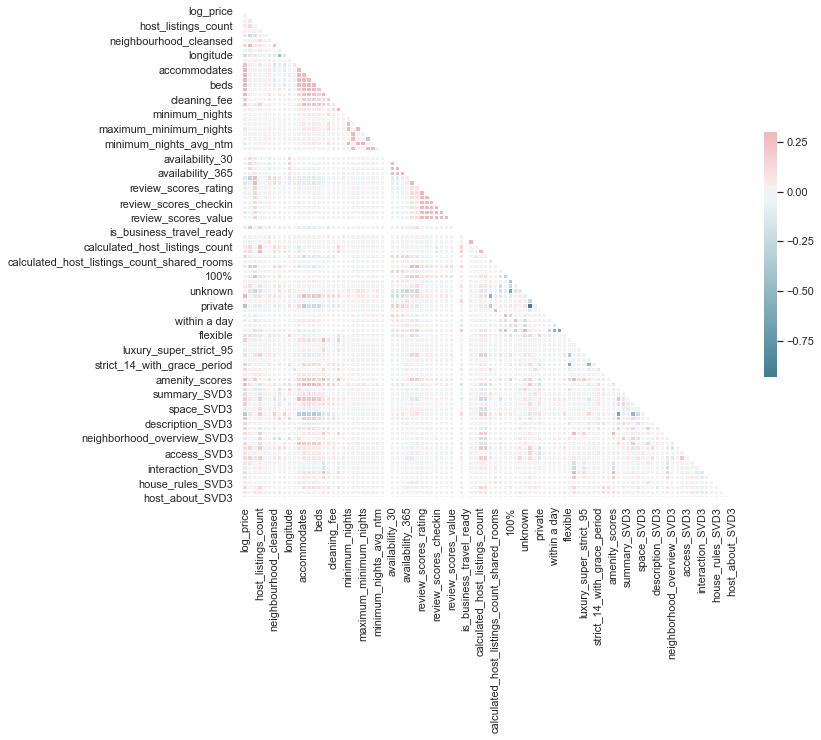

In [123]:
##----Plot correlation to see textual features----##

sns.set(style="white")

# Compute the correlation matrix
corr = new_features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [124]:
##----Inspect missing values in textual data----##
df_in2.isna().sum()


summary                    776
space                     6754
description                456
neighborhood_overview     7811
notes                    13608
transit                   8585
access                   10288
interaction               9251
house_rules              12155
host_about               11328
dtype: int64

## Sentiment Analysis (from reviews)

In [125]:
import nltk
#nltk.download('vader_lexicon')
#nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
from googletrans import Translator
import langid
#from langid.langid import LanguageIdentifier, model

ModuleNotFoundError: No module named 'googletrans'

In [ ]:
reviews_df = pd.read_csv("../Data/reviews.csv")

#remove reviews from after Dec 2019
reviews_df = reviews_df[(reviews_df['date'] < "2020-01-01")]

#missing_data = reviews_df["comments"].isnull()
#print (missing_data.value_counts())

#remove rows with no comment
reviews_df = reviews_df.dropna(subset=['comments'])

#replace comments in other lang with empty string
reviews_df["comments"] = reviews_df["comments"].map(lambda x: (x if langid.classify(x)[0]=='en' else ""))

#translator = Translator()
#reviews_df["comments_english"] = reviews_df["comments"].map(lambda x: translator.translate(x, dest="en").text)

print(reviews_df.shape)
reviews_df.head(5)

In [ ]:
#temp = reviews_df["comments"]

#remove empty comments (from other language)
reviews_df["comments"] = reviews_df["comments"].replace('', np.nan)
reviews_df = reviews_df.dropna(subset=['comments'])

reviews_df.head(10)

In [ ]:
temp = reviews_df#.head(50000)

sid = SentimentIntensityAnalyzer()
sent_scores = []

for index, row in temp.iterrows():
    message_text = str(row['comments'])
    scores = sid.polarity_scores(message_text)
    sent_scores.append(scores['compound'])

sent_scores = np.array(sent_scores)
sen_df = pd.DataFrame(sent_scores, index=None, columns=None)
sen_df.head(10)

In [ ]:
reviews_df.reset_index(drop=True, inplace=True)
sen_df.reset_index(drop=True, inplace=True)

review_sen_df = pd.concat([reviews_df,sen_df],axis=1)
review_sen_df= review_sen_df.rename(columns={0: "sentiment_score"})
review_sen_df.head(5)

#review_sen_df["sentiment_score"].min()

In [ ]:
#listing_sen_df = review_sen_df.groupby('listing_id', as_index=False)['sentiment_score'].mean()
#listing_sen_df = review_sen_df.groupby('listing_id', as_index=False).agg({ 'sentiment_score': [('sentiment_score1','mean'),('sentiment_score2','max')]})

#listing_sen_df["listing_id"] = listing_sen_df["listing_id"].astype(int)


ids = review_sen_df.groupby('listing_id', as_index=False)['sentiment_score'].mean()


listing_sen_df1 = review_sen_df.groupby('listing_id', as_index=False)['sentiment_score'].apply(lambda x: x[x > 0.8].count())
listing_sen_df2 = review_sen_df.groupby('listing_id', as_index=False)['sentiment_score'].apply(lambda x: x[x <= 0.8].count())

listing_sen_df = pd.concat([ids["listing_id"], listing_sen_df1,listing_sen_df2],axis=1)
listing_sen_df.rename(columns={0:'sentiment_score',1:'sentiment_score1'}, inplace=True)

listing_sen_df['tot'] = listing_sen_df.sentiment_score + listing_sen_df.sentiment_score1
listing_sen_df['sentiment_score'] = listing_sen_df.sentiment_score / listing_sen_df.tot
listing_sen_df['sentiment_score1'] = listing_sen_df.sentiment_score1 / listing_sen_df.tot

#listing_sen_df = listing_sen_df[["listing_id", "sentiment_score"]]

listing_sen_df.head(50)

In [ ]:
data_path = "experimental_data_5_.csv"
df_in = pd.read_csv(data_path)
existing_features = df_in[["id","log_price", "accommodates", "bedrooms", "bathrooms", "longitude", "latitude", "cleaning_fee", "property_type", "neighbourhood_cleansed", "beds", "number_of_reviews_ltm", "room_type", "zipcode", "extra_people", "review_scores_value", "amenity_scores"]]


df_comb = existing_features.set_index('id').join(listing_sen_df.set_index('listing_id'))
df_comb['sentiment_score'].fillna((df_comb['sentiment_score'].mean()), inplace=True)
df_comb.head(5)

#df_comb.sort_values(by=['sentiment_score'])

In [ ]:
#existing_features = df_in[["log_price", "accommodates", "bedrooms", "bathrooms", "longitude", "latitude", "cleaning_fee", "property_type", "neighbourhood_cleansed", "beds", "number_of_reviews_ltm", "room_type", "zipcode", "extra_people", "review_scores_value", "amenity_scores"]]
#existing_features.to_csv("../sample_data_6.csv", index=False) #save test data
df_comb.to_csv("../sample_data_7.csv", index=False) #save test data

In [ ]:
print(df["log_price"].corr(df_comb["sentiment_score"]))

In [ ]:
reviews_df = pd.read_csv("../Data/reviews.csv")

#remove reviews from after Dec 2019
reviews_df = reviews_df[(reviews_df['date'] < "2020-01-01")]

print(reviews_df.shape)
reviews_df.head(5)

In [ ]:
sid = SentimentIntensityAnalyzer()
message_text = '''Like you, I am getting very frustrated with this process. I am genuinely trying to be as reasonable as possible. I am not trying to "hold up" the deal at the last minute. I'm afraid that I am being asked to take a fairly large leap of faith after this company (I don't mean the two of you -- I mean Enron) has screwed me and the people who work for me.'''
scores = sid.polarity_scores(message_text)
for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

print('Sentiment Score: {0}'.format(scores['compound']))
        
        

In [ ]:
# below is the sentiment analysis code rewritten for sentence-level analysis
# note the new module -- word_tokenize!
# import nltk.data
# from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

# We will also initialize our 'english.pickle' function and give it a short name

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

message_text = '''It seems to me we are in the middle of no man's land with respect to the  following:  Opec production speculation, Mid east crisis and renewed  tensions, US elections and what looks like a slowing economy (?), and no real weather anywhere in the world. I think it would be most prudent to play  the markets from a very flat price position and try to day trade more aggressively. I have no intentions of outguessing Mr. Greenspan, the US. electorate, the Opec ministers and their new important roles, The Israeli and Palestinian leaders, and somewhat importantly, Mother Nature.  Given that, and that we cannot afford to lose any more money, and that Var seems to be a problem, let's be as flat as possible. I'm ok with spread risk  (not front to backs, but commodity spreads). The morning meetings are not inspiring, and I don't have a real feel for  everyone's passion with respect to the markets.  As such, I'd like to ask  John N. to run the morning meetings on Mon. and Wed.  Thanks. Jeff'''

# The tokenize method breaks up the paragraph into a list of strings. In this example, note that the tokenizer is confused by the absence of spaces after periods and actually fails to break up sentences in two instances. How might you fix that?

sentences = tokenizer.tokenize(message_text)

# We add the additional step of iterating through the list of sentences and calculating and printing polarity scores for each one.

for sentence in sentences:
        print(sentence)
        scores = sid.polarity_scores(sentence)
        for key in sorted(scores):
                print('{0}: {1}, '.format(key, scores[key]), end='')
        print()


In [ ]:
#for x in range(0,5000):
#    langid.classify("Das Cottage liegt ruhig und")
#identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
#identifier.classify("This is a test")
langid.classify("Hello")[0]=='en'